In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')
links = pd.read_csv('/content/links.csv')

###User Ids
MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

### Movie Ids
Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

## Ratings Data File Structure (ratings.csv)
All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

##Tags Data File Structure (tags.csv)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp

## Movies Data File Structure (movies.csv)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,title,genres


## Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,imdbId,tmdbId

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
ratings['movieId'].nunique()

9724

In [10]:
print("There are {} users and {} movies in this dataset."\
      .format(ratings.userId.nunique(),
              ratings.movieId.nunique()))

There are 610 users and 9724 movies in this dataset.


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [40]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## EDA

In [36]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

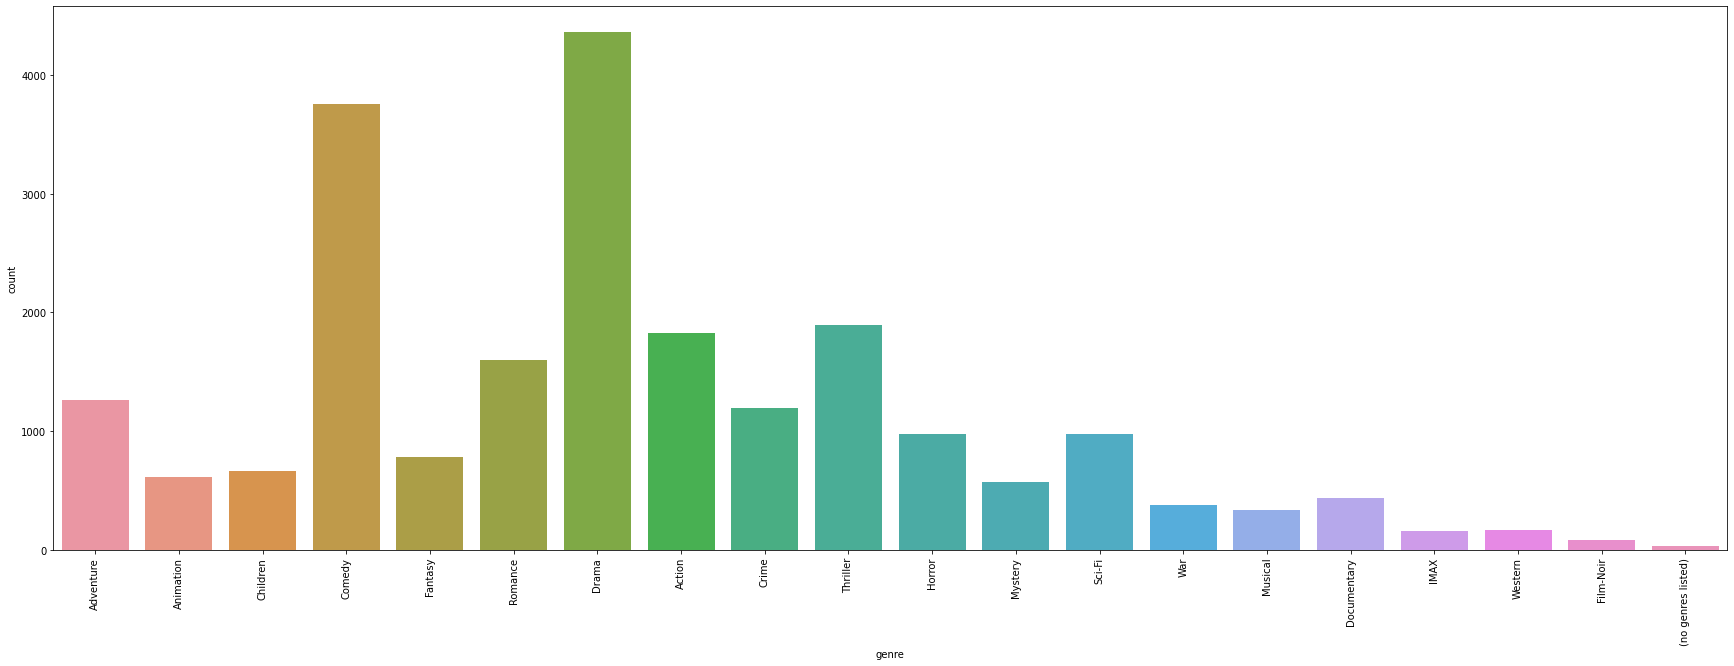

In [38]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 90)
sns.countplot(data = genres_unique, x = 'genre')
plt.show()

가장 인기 많은 장르는 Drama이다

In [42]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head()

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


Text(0, 0.5, 'Number Of Users Voted for Movie')

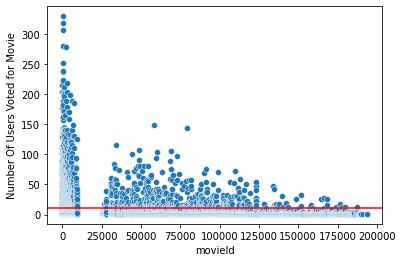

In [43]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'movieId', data = numberOf_user_voted_for_movie)
plt.axhline(y=10,color='r')
plt.ylabel('Number Of Users Voted for Movie')

In [45]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))     
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head()

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [49]:
numberOf_movies_voted_by_user['rating'].max()

2698

Text(0, 0.5, 'Number Of Movies rated by user')

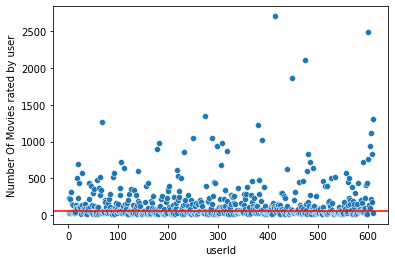

In [47]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'userId', data = numberOf_movies_voted_by_user)
plt.axhline(y=60,color='r')
plt.ylabel('Number Of Movies rated by user')

In [ ]:
# Convert genres to one hot encoding
df = pd.merge(movies, ratings)
mdf = pd.concat([df.drop('genres', axis=1), df.genres.str.get_dummies(sep='|')], axis=1)  

#get unique genres as 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

In [17]:
# movies랑 ratings 합치기
data = pd.merge(movies,ratings)
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [18]:
# 여기서는 movieid, title,uerid,rating만 남겨두기로 한다
data.drop(["genres","timestamp"], axis = 1,inplace = True)
data

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [19]:
data_pivot = data.pivot_table(index='userId',columns='title',values='rating')
data_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [61]:
data_pivot.fillna(0, inplace = True)
data_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [111]:
data_pivot2 = pd.pivot(index = "movieId", columns = "userId", data = ratings, values = "rating")
data_pivot2

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 결측값은 0으로 채워준다
data_pivot2.fillna(0, inplace = True)
data_pivot2

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
final_movie = data_pivot2.fillna(data_pivot2.mean(axis=0))
final_movie = final_movie.T

# Replacing NaN by user Average
final_user = data_pivot2.apply(lambda row: row.fillna(row.mean()), axis=1)
final_user = final_user.T

## 1. Memory based CF

이 모델은 user와 item의 데이터를 직접적으로 연관시키고 추천하기 때문에 설명성이 높고 적용이 용의 하다.

하지만, sparse 한 data인 경우 성능이 저하되고, (cold start문제도 이런 문제 때문이다.) 쉽게 확장할 수 없다. 그 이유는 추천 결과를 생성할 때마다 많은 연산을 요구하기 때문이다.

1.1 - user based

user 간의 유사도(similarity matrix)를 측정한 뒤 유사도가 높은 user들이 선호하는 상품을 추천한다.

In [117]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.998732,0.997818,0.997369,0.998658,0.997820,0.997871,0.998665,0.998684,0.997801,...,0.998638,0.998294,0.994509,0.998482,0.998174,0.997166,0.998008,0.995296,0.998753,0.996755
2,0.998732,0.000000,0.999035,0.998466,0.999792,0.998939,0.999024,0.999765,0.999792,0.998966,...,0.999737,0.999415,0.995969,0.999636,0.999404,0.998373,0.999066,0.996767,0.999891,0.997809
3,0.997818,0.999035,0.000000,0.997621,0.998921,0.998151,0.998193,0.998920,0.998966,0.998140,...,0.998875,0.998578,0.995246,0.998811,0.998578,0.997409,0.998248,0.995962,0.999059,0.997013
4,0.997369,0.998466,0.997621,0.000000,0.998334,0.997598,0.997799,0.998414,0.998400,0.997826,...,0.998285,0.998139,0.994521,0.998247,0.998083,0.996917,0.997719,0.995256,0.998506,0.996276
5,0.998658,0.999792,0.998921,0.998334,0.000000,0.998856,0.998935,0.999644,0.999704,0.998856,...,0.999660,0.999298,0.995908,0.999536,0.999283,0.998281,0.998985,0.996645,0.999818,0.997667


In [118]:
# user similarity on replacing NAN by item(movie) avg
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )
similarity_with_movie = pd.DataFrame(cosine,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.999542,0.998167,0.998170,0.999449,0.998593,0.998280,0.999451,0.999264,0.998673,...,0.999553,0.999013,0.994362,0.999346,0.998835,0.997387,0.999035,0.994793,0.999560,0.996034
2,0.999542,0.000000,0.998504,0.998423,0.999780,0.998977,0.998621,0.999755,0.999588,0.999024,...,0.999880,0.999356,0.994741,0.999707,0.999205,0.997707,0.999311,0.994911,0.999899,0.996368
3,0.998167,0.998504,0.000000,0.997026,0.998369,0.997624,0.997253,0.998357,0.998212,0.997647,...,0.998507,0.997963,0.993470,0.998331,0.997827,0.996196,0.997928,0.993479,0.998529,0.995062
4,0.998170,0.998423,0.997026,0.000000,0.998300,0.997575,0.997346,0.998320,0.998133,0.997698,...,0.998417,0.998039,0.993458,0.998244,0.997844,0.996334,0.997901,0.993272,0.998450,0.994899
5,0.999449,0.999780,0.998369,0.998300,0.000000,0.998891,0.998533,0.999657,0.999484,0.998893,...,0.999785,0.999272,0.994689,0.999608,0.999076,0.997630,0.999235,0.994811,0.999815,0.996241


In [119]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [120]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,72,49,189,26,194,366,60,595,278,65,...,180,513,521,516,609,545,123,530,118,205
2,189,49,194,145,65,26,60,87,289,397,...,123,521,72,378,516,205,507,463,281,214
3,496,189,194,49,65,231,26,87,180,440,...,439,609,299,516,463,123,324,518,521,205
4,189,54,173,397,163,87,299,49,194,26,...,60,366,118,550,463,404,157,568,440,516
5,145,189,49,26,194,60,609,87,565,134,...,440,180,299,123,118,150,347,2,293,205


In [121]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_movie,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,53,49,515,189,25,251,172,72,123,348,...,194,538,519,300,54,92,400,523,439,60
2,53,189,49,515,25,251,556,348,30,172,...,523,519,60,435,54,459,205,26,595,364
3,441,53,49,515,25,189,251,440,172,30,...,92,538,569,72,231,519,435,459,609,340
4,53,128,581,189,515,49,25,54,251,299,...,87,250,214,507,459,206,194,92,435,521
5,145,35,53,49,189,25,515,251,569,507,...,123,37,348,371,319,538,214,60,194,300


In [122]:
def get_user_similar_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.userId == user1].merge(
    Rating_avg[Rating_avg.userId == user2],
    on = "movieId",
    how = "inner" )
    return common_movies.merge( movies, on = 'movieId' )

In [125]:
Mean = ratings.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(ratings,Mean,on='userId')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']

In [126]:
a = get_user_similar_movies(370,86309)
a = a.loc[ : , ['rating_x_x','rating_x_y','title']]
a.head()

,rating_x_x,rating_x_y,title


In [127]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_movie.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [128]:
score = User_item_score(320,7371)
print("score (u,i) is",score)

score (u,i) is 7.727292723330855


In [129]:
Rating_avg = Rating_avg.astype({"movieId": str})
Movie_user = Rating_avg.groupby(by = 'userId')['movieId'].apply(lambda x:','.join(x))

In [134]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
check.head()

movieId,1,10,100,100044,100068,100083,100106,100159,100163,100194,...,99750,99764,998,99813,99846,99853,999,99910,99917,99992
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
def User_item_score1(user):
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    score = []
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movieId')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

In [135]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_movies = User_item_score1(user)
print(" ")
print("The Recommendations for User Id : 370")
print("   ")
for i in predicted_movies:
    print(i)

Enter the user id to whom you want to recommend : 370
 
The Recommendations for User Id : 370
   
Inception (2010)
Schindler's List (1993)
Dark Knight, The (2008)
Forrest Gump (1994)
Godfather, The (1972)


1.2 - item based

item 간의 유사도를 측정한 뒤 rating을 매긴다. user based와 똑같지만, target만 달라진다고 보면 된다.

In [66]:
ratings_movies = pd.merge(ratings, movies, on = 'movieId')
ratings_movies.head(1)
ratings_movies.shape

(100836, 6)

In [68]:
data = ratings_movies.pivot_table('rating', index = 'userId', columns = 'title').fillna(0)
data.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
data.shape
data = data.transpose()
data.head(2)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
movie_sim = cosine_similarity(data, data)
print(movie_sim.shape)

(9719, 9719)


In [72]:
movie_sim_df = pd.DataFrame(data = movie_sim, index = data.index, columns = data.index)
movie_sim_df.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [77]:
movie_sim_df.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [78]:
movie_sim_df["'Hellboy': The Seeds of Creation (2004)"].sort_values(ascending=False)[1:10]

title
Monsters (2010)                                               1.000000
'Hellboy': The Seeds of Creation (2004)                       1.000000
All the Right Moves (1983)                                    0.780869
Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)    0.747409
...And Justice for All (1979)                                 0.715542
'Round Midnight (1986)                                        0.707107
Kagemusha (1980)                                              0.542720
Sanjuro (Tsubaki Sanjûrô) (1962)                              0.526685
Ghost Rider: Spirit of Vengeance (2012)                       0.525226
Name: 'Hellboy': The Seeds of Creation (2004), dtype: float64

## 2. Model based CF

이 모델은 적은 데이터에서도 잘 동작한다. 또한 user에게 더 많은 item을 추천하며, 쉽게 확장할 수 있다. 즉, 한번 모형을 학습하면 다음 추천 결과를 생성하는데 시간과 연산량이 많이 소요되지 않는다. 하지만, Model based는 첫 모형 학습 시 시간과 연산량이 많이 소요된다.

2.1 Centered k-NN(k-Nearest Neighborus)

In [80]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
final_dataset = data_pivot2.copy()
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
csr_sample = csr_matrix(sample)
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [81]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [82]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [83]:
get_movie_recommendation('Watchmen')

,Title,Distance
1,Lucky Number Slevin (2006),0.462386
2,Zombieland (2009),0.461453
3,Scott Pilgrim vs. the World (2010),0.460941
4,Thor (2011),0.460684
5,"Hurt Locker, The (2008)",0.459309
6,Kick-Ass (2010),0.458334
7,X-Men Origins: Wolverine (2009),0.447918
8,Source Code (2011),0.435213
9,Quantum of Solace (2008),0.432500
10,Iron Man (2008),0.428636


2.2 SVD

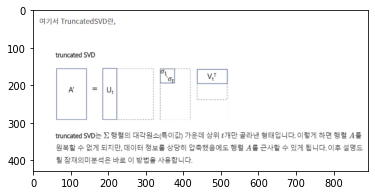

In [102]:
import matplotlib.pyplot as plt
img_color = plt.imread('/content/KakaoTalk_20220920_213904162.png')
plt.imshow(img_color)

TruncatedSVD는 일반적인 SVD와 달리 상위 몇개의 singular value만 골라 사용한다

In [84]:
movie_sim_rating = movie_sim_df.values.T

In [85]:
from sklearn.decomposition import TruncatedSVD

In [86]:
SVD = TruncatedSVD(n_components=12)

In [87]:
matrix = SVD.fit_transform(movie_sim_rating)
matrix.shape

(9719, 12)

In [88]:
corr = np.corrcoef(matrix)
corr.shape

(9719, 9719)

In [100]:
movie_title =data.T.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index('Being Human (1993)')
# Being Human (1993) 영화의 인덱스를 찾아주면 945 인 것을 확인할 수 있다.
coffey_hands

945

In [101]:
# Being Human (1993)와 비슷한 영화 10개를 찾아보자
corr_coffey_hands = corr[coffey_hands]
list(movie_title[corr_coffey_hands>=0.9])[:10]

["'Round Midnight (1986)",
 "'burbs, The (1989)",
 '1-900 (06) (1994)',
 '13 Ghosts (1960)',
 '13th Warrior, The (1999)',
 '1776 (1972)',
 '1984 (Nineteen Eighty-Four) (1984)',
 '20 Dates (1998)',
 '20,000 Leagues Under the Sea (1916)',
 '2001: A Space Odyssey (1968)']